# Interpolation methods of VTUInterface and their performance

In [28]:
import vtuIO
import numpy as np
import time
import matplotlib.pyplot as plt

File: 3D 1694472 Hexahedra, 169806 points, 800MB

In [2]:
file = "/home/buchwalj/test/body_force/TRM_excavation_cavern_butrue_ts_2_t_129600.000000.vtu"

In [3]:
bounds = {"x":[-50,50], "y":[-10,70], "z": [-50,50]}

In [31]:
interp = {"scipy": ["nearest", "linear"],"vtk":["probefilter","voronoi","gaussian","shepard","linear"]}

In [68]:
def run_interpol_get_data():
    m = {}
    results = {}
    time_interpol2 = {}
    for backend, methods in interp.items():
        for method in methods:
            start = time.time()
            m[backend] = vtuIO.VTUIO(file, dim=3, interpolation_backend=backend, nneighbors=150)
            results[f"{backend}_{method}"] = m[backend].get_data("pressure", pts=pts, interpolation_method=method)
            time_interpol2[f"{backend}_{method}"] = time.time()-start
    categories = list(time_interpol2.keys())
    values = list(time_interpol2.values())
    return categories, values

In [76]:
def run_interpol_get_set_data():
    m = {}
    results = {}
    time_interpol1 = {}
    for backend, methods in interp.items():
        for method in methods:
            start = time.time()
            m[backend] = vtuIO.VTUIO(file, dim=3, interpolation_backend=backend, nneighbors=150)
            results[f"{backend}_{method}"] = m[backend].get_set_data("pressure", data_type="point", pointsetarray=pointnumpyarray, interpolation_method=method)
            time_interpol1[f"{backend}_{method}"] = time.time()-start
    categories = list(time_interpol1.keys())
    values = list(time_interpol1.values())
    return categories, values

In [72]:
def plot(categories, values):
    fig = plt.figure(figsize = (10, 5))
 
    # creating the bar plot
    plt.bar(categories, values, color ='maroon',
        width = 0.4)
    plt.ylabel("time / s")
    plt.xlabel("interpolation method")
    plt.show()

# 10 points

In [63]:
n = 10

In [64]:
pts = {}
for i in range(n):
    pts[f"pt{i}"] = (np.random.uniform(bounds["x"][0],bounds["x"][1]),
                     np.random.uniform(bounds["y"][0],bounds["y"][1]),
                     np.random.uniform(bounds["z"][0],bounds["z"][1]))

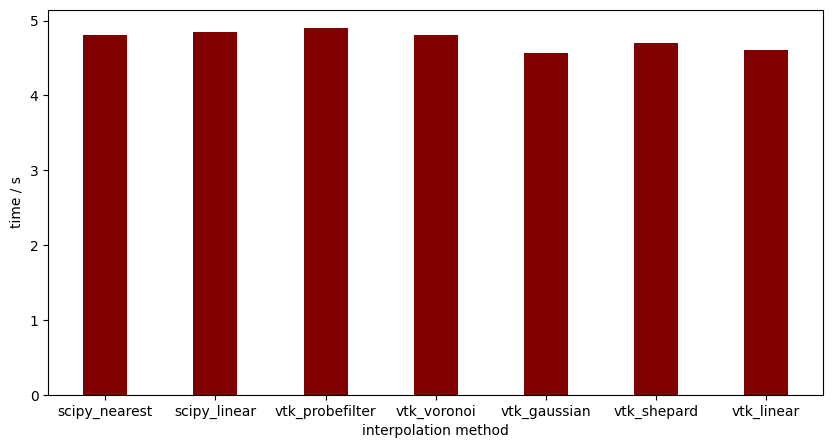

In [73]:
a,b = run_interpol_get_data()
plot(a,b)

In [74]:
pointnumpyarray = np.array([pts[pt] for pt in pts])

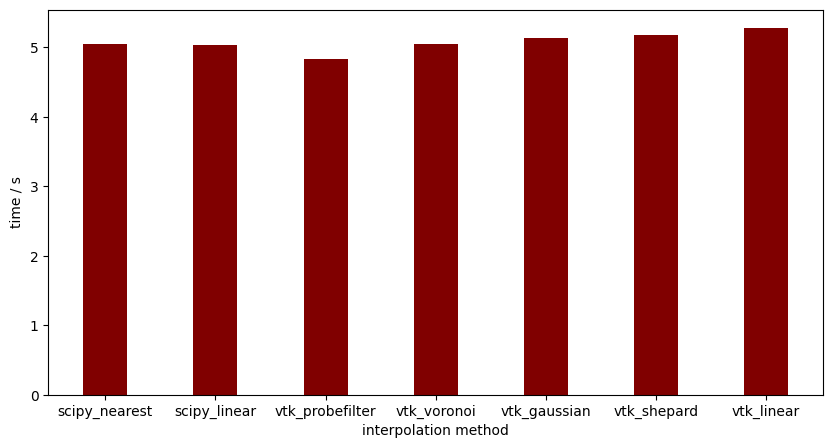

In [77]:
a,b = run_interpol_get_set_data()
plot(a,b)

## get_data() and get_set_data() should take about the same time as both use the same algorithms

# 100 points

In [78]:
n = 100

In [79]:
pts = {}
for i in range(n):
    pts[f"pt{i}"] = (np.random.uniform(bounds["x"][0],bounds["x"][1]),
                     np.random.uniform(bounds["y"][0],bounds["y"][1]),
                     np.random.uniform(bounds["z"][0],bounds["z"][1]))

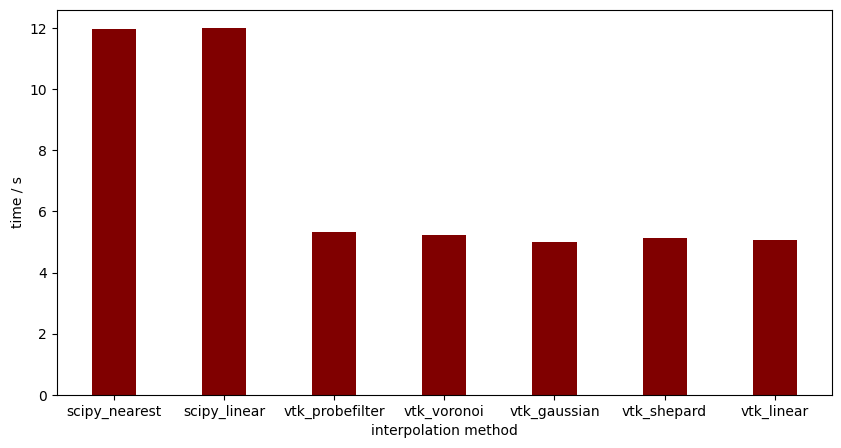

In [80]:
a,b = run_interpol_get_data()
plot(a,b)

# 1000 points

In [81]:
n = 1000

In [82]:
pts = {}
for i in range(n):
    pts[f"pt{i}"] = (np.random.uniform(bounds["x"][0],bounds["x"][1]),
                     np.random.uniform(bounds["y"][0],bounds["y"][1]),
                     np.random.uniform(bounds["z"][0],bounds["z"][1]))

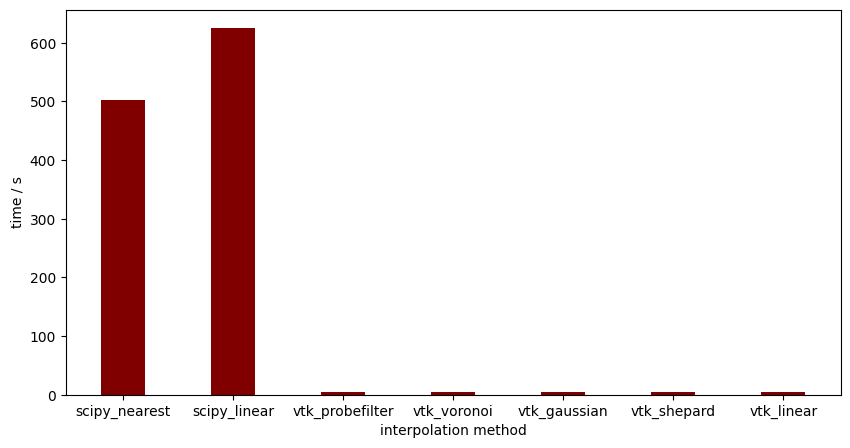

In [83]:
a,b = run_interpol_get_data()
plot(a,b)